<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%202%20Review%20of%20Rock%20and%20Fluid%20Properties/notebook/2_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 2. Review of Rock and Fluid Properties (Problems)**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 188 (delta 10), reused 0 (delta 0), pack-reused 158
Receiving objects: 100% (188/188), 217.21 KiB | 602.00 KiB/s, done.
Resolving deltas: 100% (77/77), done.


In [0]:
import sys, os
sys.path.append('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/functions')

# Problem 2.2 

Text(0.5, 1.0, 'Relative Permeabilities')

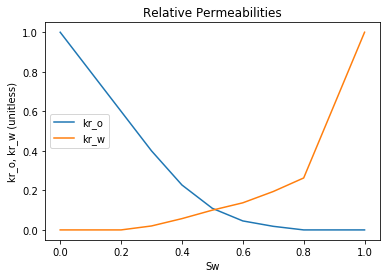

In [0]:
flowrate = pd.read_csv('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/data/Table 2.14-Data for Problem 2.2.csv')

"Question. calculate relative permeabilities of oil and water"

qo_sw0 = flowrate.loc[flowrate['Sw'] == 0] 
qo_sw0 = np.array(qo_sw0.qo) # qo at Sw=0
qw_sw1 = flowrate.loc[flowrate['Sw'] == 1] 
qw_sw1 = np.array(qw_sw1.qw) # qw at Sw=1
qw_sw1

kr_o = flowrate.qo / qo_sw0 #qo per q0 at Sw=0
kr_w = flowrate.qw / qw_sw1 #qw per qw at Sw=1

# plot result
p1 = plt.plot(flowrate.Sw, kr_o)
p2 = plt.plot(flowrate.Sw, kr_w)
plt.xlabel("Sw"); plt.ylabel("kr_o, kr_w (unitless)")
plt.legend((p1[0], p2[0]), ('kr_o', 'kr_w'))
plt.title("Relative Permeabilities")

# Problem 2.3

Text(0, 0.5, 'Pc (psi)')

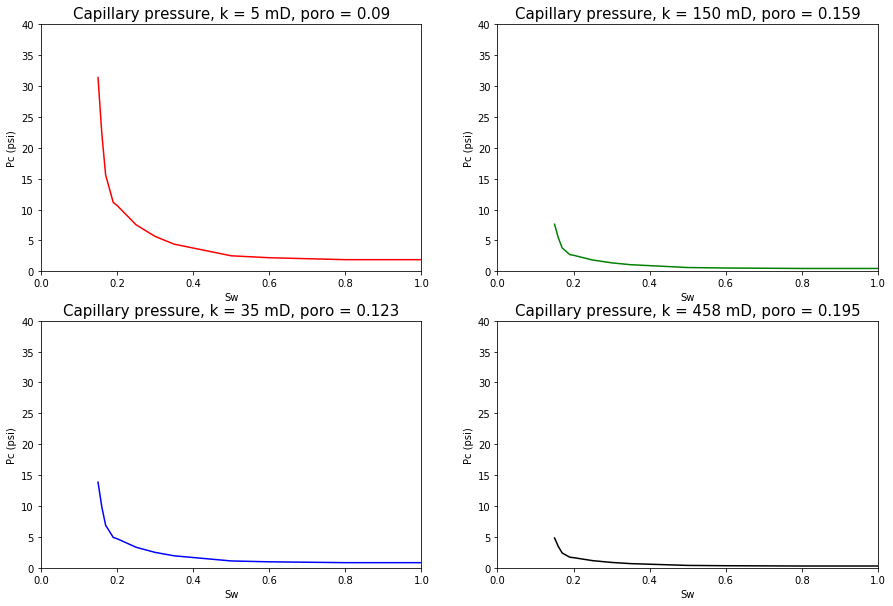

In [0]:
jfunction = pd.read_csv('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/data/Table 2.15-J Function for Problem 2.3.csv')

"Question. calculate capillary pressures of four cores in the following conditions"

# k1 = 5; poro1 = 0.09; k2 = 35; poro2 = 0.123; k3 = 150; poro3 = 0.159; k4 = 458; poro4 = 0.195 # permeability in mD

k_conversion = 1 / 1000 * (0.98689233 * 1E-08) # convert k from mD to cm2
# core information: k, porosity
core1 = np.array([5 * k_conversion, 0.09]); core2 = np.array([35 * k_conversion, 0.123]) 
core3 = np.array([150 * k_conversion, 0.159]); core4 = np.array([458 * k_conversion, 0.195])

# known
sigma = 85 * (1/68947.57) # interfacial tension, from dyne/cm convert to psi/cm, 1 psi = 68947.57 dyne/cm2 
theta = 65

# calculate Pc for all cores and all Sw
Pc_1 = (jfunction.J * sigma * np.cos(np.deg2rad(theta))) * np.sqrt(core1[1] / core1[0])
Pc_2 = (jfunction.J * sigma * np.cos(np.deg2rad(theta))) * np.sqrt(core2[1] / core2[0])
Pc_3 = (jfunction.J * sigma * np.cos(np.deg2rad(theta))) * np.sqrt(core3[1] / core3[0])
Pc_4 = (jfunction.J * sigma * np.cos(np.deg2rad(theta))) * np.sqrt(core4[1] / core4[0])

# plot all capillary pressure curves
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0, 0].plot(jfunction[['Sw']], Pc_1, 'r') #row=0, col=0
ax[0, 0].set_title('Capillary pressure, k = 5 mD, poro = 0.09', size = 15)
ax[0, 0].set(xlim=(0, 1), ylim=(0, 40)) 
ax[0, 0].set_xlabel("Sw")
ax[0, 0].set_ylabel("Pc (psi)")
ax[1, 0].plot(jfunction[['Sw']], Pc_2, 'b') #row=1, col=0
ax[1, 0].set_title('Capillary pressure, k = 35 mD, poro = 0.123', size = 15)
ax[1, 0].set(xlim=(0, 1), ylim=(0, 40)) 
ax[1, 0].set_xlabel("Sw")
ax[1, 0].set_ylabel("Pc (psi)")
ax[0, 1].plot(jfunction[['Sw']], Pc_3, 'g') #row=0, col=1
ax[0, 1].set_title('Capillary pressure, k = 150 mD, poro = 0.159', size = 15)
ax[0, 1].set(xlim=(0, 1), ylim=(0, 40)) 
ax[0, 1].set_xlabel("Sw")
ax[0, 1].set_ylabel("Pc (psi)")
ax[1, 1].plot(jfunction[['Sw']], Pc_4, 'k') #row=1, col=1
ax[1, 1].set_title('Capillary pressure, k = 458 mD, poro = 0.195', size = 15)
ax[1, 1].set(xlim=(0, 1), ylim=(0, 40)) 
ax[1, 1].set_xlabel("Sw")
ax[1, 1].set_ylabel("Pc (psi)")

# Problem 2.4

In [0]:
# Question. calculate z of sour gas using Dranchuk-Abou Kassem EOS

pressure = 2010
temp_fahrenheit = 75
sg = 0.7
x_h2s = 0.07
x_co2 = 0.1

temp = temp_fahrenheit + 459.67 # convert to Rankine

# calculate pseudocritical properties (Sutton, valid for 0.57<sg<1.68)
P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

# calculate adjustment to pseudocritical properties for sour gas (Wiechert-Aziz, valid for x_co2<0.544 and x_h2s<0.738)
e = (120 * (((x_h2s + x_co2)**0.9) - ((x_h2s + x_co2)**1.6))) + (15 * (x_h2s**0.5 - x_h2s**4))
T_pc_corr = T_pc - e # corrected T_pc
P_pc_corr = (P_pc * T_pc_corr) / (T_pc - x_h2s * e * (1-x_h2s))

# calculate pseudoreduced properties
P_pr = pressure / P_pc_corr
T_pr = temp / T_pc_corr

"Dranchuk-Abou Kassem EOS Solver"

import dranchuk_aboukassem
from dranchuk_aboukassem import dranchuk

rho_pr, z = dranchuk(T_pr, P_pr)

print("Gas compressibility factor using Drancuk-Abou Kassem EOS: ",z)

Gas compressibility factor using Drancuk-Abou Kassem EOS:  0.7730732979223308


# Problem 2.5

In [0]:
def mattar(T_pr, P_pr, rho_pr, z):
  import numpy as np

  a1 = 0.3265; a2 = -1.0700; a3 = -0.5339; a4 = 0.01569; a5 = -0.05165; a6 = 0.5475
  a7 = -0.7361; a8 = 0.1844; a9 = 0.1056; a10 = 0.6134; a11 = 0.7210

  do = ((a1 + (a2/T_pr) + (a3/T_pr**3) +(a4/T_pr**4) + (a5/T_pr**5)) * rho_pr) + \
      (2 * ((a6 + (a7/T_pr) + (a8/T_pr**2))) * rho_pr**2) - \
      (5 * a9 * (((a7/T_pr) + (a8/T_pr**2))) * rho_pr**4) + (1 + (a11 * rho_pr**2) - (a11 * rho_pr**2)**2) \
      * ((2 * a10 * rho_pr / T_pr**3)*np.exp(-a11 * rho_pr**2))

  c_pr_analytical = (1 / P_pr) - ((0.27 / (z**2 * T_pr)) * (do / (1 + ((rho_pr / z) * do))))
  cgas_analytical = c_pr_analytical / P_pc_corr
  return(cgas_analytical)

In [0]:
"Question. calculate gas compressibility analytically using Mattar method"

# known: properties similar to Problem 2.4

from mattar import mattar

cgas_analytical = mattar(T_pr, P_pr, rho_pr, z, P_pc_corr)

print("Gas isothermal compressibility at 1 atm using Mattar analytical: ",cgas_analytical,"psi^-1")

Gas isothermal compressibility at 1 atm using Mattar analytical:  0.0004804635269145755 psi^-1


# Problem 2.6

Skipped, has been solved in Example 2.5 Question 3

# Problem 2.7

In [0]:
# Question. calculate z of sour gas using Dranchuk-Abou Kassem EOS

pressure = 2910
temp_fahrenheit = 165
sg = 0.76
x_n2 = 0.17 # x_h2s is now x_n2, nitrogen composition
x_co2 = 0.12

temp = temp_fahrenheit + 459.67 # convert to Rankine

# calculate pseudocritical properties (Sutton, valid for 0.57<sg<1.68)
P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

# calculate adjustment to pseudocritical properties for sour gas (Wiechert-Aziz, valid for x_co2<0.544 and x_h2s<0.738)
e = (120 * (((x_n2 + x_co2)**0.9) - ((x_n2 + x_co2)**1.6))) + (15 * (x_n2**0.5 - x_n2**4))
T_pc_corr = T_pc - e # corrected T_pc
P_pc_corr = (P_pc * T_pc_corr) / (T_pc - x_n2 * e * (1-x_n2))

# calculate pseudoreduced properties
P_pr = pressure / P_pc_corr
T_pr = temp / T_pc_corr

"Dranchuk-Abou Kassem EOS Solver"

import dranchuk_aboukassem
from dranchuk_aboukassem import dranchuk

rho_pr, z = dranchuk(T_pr, P_pr)

print("Gas compressibility factor using Drancuk-Abou Kassem EOS: ",z)

Gas compressibility factor using Drancuk-Abou Kassem EOS:  0.884387700002946


# Problem 2.8 

In [0]:
"Question 1. calculate gas density"

R = 10.732 # gas constant in (ft3*psi)/(lb-mol*R), see gas constants above
rhogas = (28.97 * sg * pressure) / (z * R * temp)
print("Gas density: ",rhogas, "lbm/ft3")

Gas density:  10.80640075648603 lbm/ft3


In [0]:
"Question 1. calculate gas FVF"

Bg = 0.0282793 * z * temp / pressure

print("Gas volume factor: ",Bg, "res ft3/scf")

Gas volume factor:  0.005368698426960609 res ft3/scf


# Problem 2.9 

Question 1 and 3 must be solved graphically.

In [0]:
"Question 2. calculate gas viscosity using Lee et al"

Mg = 28.97 * sg
K = ((0.00094 + 2E-06)*(temp**1.5)) / (209 + 19*Mg + temp)
rhogas_lee = rhogas * 0.0160185 # lbm/ft3 converted to gas density unit of Lee et al (g/cm3)
x = 3.5 + (986 / temp) + (0.01 * Mg)
y = 2.4 - 0.2*x

mu_lee = K * np.exp(x * (rhogas_lee**y))
print("Gas viscosity using Lee et al: ",mu_lee,"cP")

Gas viscosity using Lee et al:  0.019464090612580302 cP


In [0]:
"Question 4. calculate gas compressibility analytically using Mattar method"

# known: properties similar to Problem 2.4

from mattar import mattar

cgas_analytical = mattar(T_pr, P_pr, rho_pr, z, P_pc_corr)

print("Gas isothermal compressibility at 1 atm using Mattar analytical: ",cgas_analytical,"psi^-1")

Gas isothermal compressibility at 1 atm using Mattar analytical:  0.0002960305541823685 psi^-1


# Problem 2.10 (Not solved yet)

In [0]:
"Question 1. Calculate z factor using real gas law"

pressure = 1 # in MPa
volume = 20 * 1E+06 # from m3 to cm3
mol = 5373 * 1000 # from kg-mol to mol
temp = 37.8 + 273 # from celsius to Kelvin

R = 8.314 # gas constant in cm3*MPa/(K*mol)

z = (pressure * volume) / (mol * R * temp)
z = z * 1000 # why ???
print("Gas z factor: ",z)

Gas z factor:  1.4405293950320823


In [0]:
# z = 1 - (c3*(rho_pr**5)) + (c2*(rho_pr**2)) + (c1*(rho_pr**1)) + c4

temp = temp * 1.8 # from Kelvin to Rankine

def f(sg, temp):
  # temp = temp * 1.8 # from Kelvin to Rankine

  P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
  T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

  T_pr = temp / T_pc
  P_pr = pressure / P_pc

  rho_pr = (0.27 * P_pr) / (z * T_pr)

  a1 = 0.3265; a2 = -1.0700; a3 = -0.5339; a4 = 0.01569; a5 = -0.05165; a6 = 0.5475
  a7 = -0.7361; a8 = 0.1844; a9 = 0.1056; a10 = 0.6134; a11 = 0.7210

  c1 = a1 + (a2/T_pr) + (a3/(T_pr**3))+ (a4/(T_pr**4))+ (a5/(T_pr**5))
  c2 = a6 + (a7/T_pr) + (a8/(T_pr**2))
  c3 = a9*((a7/T_pr) + (a8/(T_pr**2)))
  c4 = (a10)*(1+(a11*(rho_pr**2)))*((rho_pr**2)/(T_pr**3))*(np.exp(-a11*(rho_pr**2)))

  y = z + (c3*(rho_pr**5)) - (c2*(rho_pr**2)) - (c1*(rho_pr**1)) - c4 - 1
  # z = 1 - (c3*(rho_pr**5)) + (c2*(rho_pr**2)) + (c1*(rho_pr**1)) + c4

  return(y)

# graphical method

# sg = np.linspace(0, 2, 100)

# y_values = f(sg, temp)

# from scipy.optimize import fsolve

# sg = fsolve(f, 1, temp)
# sg

# use sympy

from sympy import Eq, Symbol, solve

# y = Symbol('y')
# eqn = Eq(y*(8.0 - y**3), 8.0)

# print solve(eqn)

# Problem 2.11

In [54]:
"Question. calculate gas FVF of similar gas in Examples 2.6 and 2.7"

# known
Rsb = 500 # gas-oil ratio AT and ABOVE BUBBLEPOINT pressure, in scf/STB
temp2 = 220 # reservoir temperature, in deg F
sg2 = 0.8
api = 30 # specific gravity of oil, deg API

pressure2 = np.array([100, 300, 500, 800, 1000, 1300, 1600, 2000, 2500, 2651.7])

# First, calculate bubblepoint pressure, using Vazquez-Beggs

from pbubble import pbubble_vazquez

P_bubble = pbubble_vazquez(Rsb, sg2, api, temp2) 
print("Bubblepoint pressure of oil using Vazquez-Beggs: ",P_bubble,"psi")

# Second, calculate FVF using Levitan-Murtha

from oilfvf import oilfvf

Bo_array = oilfvf(P_bubble, api, Rsb, sg2, temp2, pressure2)
Bo_df = pd.DataFrame({"pressure(psia)": pressure2, "formation-volume-factor(RB/STB)": Bo_array})
Bo_df

Bubblepoint pressure of oil using Vazquez-Beggs:  2650.3067919543523 psi


,pressure(psia),formation-volume-factor(RB/STB)
0,100.0,1.110043
1,300.0,1.121628
2,500.0,1.134028
3,800.0,1.153495
4,1000.0,1.166884
5,1300.0,1.187431
6,1600.0,1.208431
7,2000.0,1.237004
8,2500.0,1.273475
9,2651.7,1.335658


# Problem 2.12

Skipped, has been solved in Example 2.7

# Problem 2.13

In [55]:
# Question 1. calculate bubblepoint pressure

Rsb = 750
temp = 170
sg = 0.85
api = 40

from pbubble import pbubble_vazquez

P_bubble = pbubble_vazquez(Rsb, sg, api, temp) 
print("Bubblepoint pressure of oil using Vazquez-Beggs: ",P_bubble,"psi")

Bubblepoint pressure of oil using Vazquez-Beggs:  2507.977027993109 psi


In [56]:
# Question 2. Calculate coil, Rs, Bo, Bg, viscosity

pressure = np.arange(100, 5100, 100)

"calculate oil compressibility (coil)"

from oilcompressibility import oilcompressibility

coil = oilcompressibility(pressure, P_bubble, temp, api, Rsb, sg)

"calculate Rs"

from gasoilratio import gasoilratio

Rs = gasoilratio(pressure, P_bubble, sg, api, temp, Rsb)

"calculate Bo"

from oilfvf import oilfvf

Bo = oilfvf(P_bubble, api, Rsb, sg, temp, pressure)

"calculate Bg"

x_h2s = 0; x_co2 = 0

# First, calculate pseudoproperties

def pseudoprops(temp, sg, x_h2s, x_co2):
  temp = temp + 459.67 # convert to Rankine

  # calculate pseudocritical properties (Sutton, valid for 0.57<sg<1.68)
  P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
  T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

  # calculate adjustment to pseudocritical properties for sour gas (Wiechert-Aziz, valid for x_co2<0.544 and x_h2s<0.738)
  e = (120 * (((x_h2s + x_co2)**0.9) - ((x_h2s + x_co2)**1.6))) + (15 * (x_h2s**0.5 - x_h2s**4))
  T_pc_corr = T_pc - e # corrected T_pc
  P_pc_corr = (P_pc * T_pc_corr) / (T_pc - x_h2s * e * (1-x_h2s))

  # calculate pseudoreduced properties
  P_pr = pressure / P_pc_corr
  T_pr = temp / T_pc_corr

  return(P_pr, T_pr)

P_pr, T_pr = pseudoprops(temp, sg, x_h2s, x_co2)

# Second, compute z

from dranchuk_aboukassem import dranchuk

z_array = []

for j in range(len(P_pr)):
  rho_pr, z = dranchuk(T_pr, P_pr[j])
  z_array.append(float(z))

# ###
# for j in range(len(P_pr)):
#   if pressure[j] < P_bubble:
#     rho_pr, z = dranchuk(T_pr, P_pr[j])
#     z_array.append(float(z))

#   t = [z_array[i] / pressure[i] for i in range(len(pressure))]
#   t = np.array(t)
#   Bg = 0.0282793 * temp * t
#   if pressure[j] >= P_bubble:
#     Bg = 0
# ###

# Third, calculate Bg

# Formula: Bg = 0.0282793 * z * temp / pressure

t = [z_array[i] / pressure[i] for i in range(len(pressure))]
t = np.array(t)
Bg = 0.0282793 * temp * t

"calculate viscosity"

from oilmu import oilmu

mu_oil = oilmu(pressure, P_bubble, sg, api, temp, Rsb)

# result in dataframe
# print(mu_oil)
oily = pd.DataFrame({"Pressure (psia)": pressure, "Compressibility (psi^-1)": coil, "Gas-oil Ratio (scf/STB)": Rs, "Oil FVF (RB/STB)": Bo, "Gas FVF (res ft3/scf)": Bg, "Viscosity (cP)": mu_oil})
oily

,Pressure (psia),Compressibility (psi^-1),Gas-oil Ratio (scf/STB),Oil FVF (RB/STB),Gas FVF (res ft3/scf),Viscosity (cP)
0,100,0.002174,16.370585,1.064700,0.047376,1.513951
1,200,0.000796,37.272353,1.074605,0.023341,1.363871
2,300,0.000442,60.312473,1.085525,0.015331,1.236408
3,400,0.000291,84.861248,1.097159,0.011328,1.129932
4,500,0.000211,110.596555,1.109355,0.008928,1.040692
5,600,0.000162,137.318718,1.122019,0.007330,0.965238
6,700,0.000129,164.890478,1.135086,0.006191,0.900792
7,800,0.000107,193.211076,1.148508,0.005339,0.845195
8,900,0.000090,222.203074,1.162248,0.004678,0.796778
9,1000,0.000077,251.804916,1.176277,0.004152,0.754251


In [0]:
# Question 3. Calculate dead-oil viscosity using Egbogah correlation

loglog_mu_dead_oil_plus_one = 1.863 - (0.025086 * api) - (0.5644 * np.log10(temp))
log_mu_dead_oil_plus_one = 10**loglog_mu_dead_oil_plus_one
mu_dead_oil_plus_one = 10**log_mu_dead_oil_plus_one
mu_dead_oil = mu_dead_oil_plus_one - 1

print("Dead-oil viscosity using Egbogah correlation: ",mu_dead_oil,"cP")

# dead-oil viscosity can also be solved using Beggs-Robinson (available within oilmu.py)

Dead-oil viscosity using Egbogah correlation:  1.5046349086558242 cP


In [0]:
# Question 4. Calculate oil FVF at bubblepoint pressure using Levitan-Murtha correlation

# the code is also present in oilfvf.py

so = 141.5 / (api + 131.5)
Bo_bubble = 1 + ((0.0005 * Rsb) * ((sg / so)**0.25)) + ((0.0004*(temp- 60)) / (so * sg)) # temp in def F
print("Oil formation volume factor at bubblepoint pressure using Levitan-Murtha: ",Bo_bubble,"RB/STB")

Oil formation volume factor at bubblepoint pressure using Levitan-Murtha:  1.4405403961354764 RB/STB


# Problem 2.14

In [57]:
# Question 1. calculate bubblepoint pressure

Rsb = 150
temp = 155
sg = 0.82
api = 28

from pbubble import pbubble_vazquez

P_bubble = pbubble_vazquez(Rsb, sg, api, temp) 
print("Bubblepoint pressure of oil using Vazquez-Beggs: ",P_bubble,"psi")

Bubblepoint pressure of oil using Vazquez-Beggs:  833.6174138232668 psi


In [59]:
# Question 2. Calculate coil, Rs, Bo, Bg, viscosity

pressure = np.arange(100, 3600, 100)

"calculate oil compressibility (coil)"

from oilcompressibility import oilcompressibility

coil = oilcompressibility(pressure, P_bubble, temp, api, Rsb, sg)

"calculate Rs"

from gasoilratio import gasoilratio

Rs = gasoilratio(pressure, P_bubble, sg, api, temp, Rsb)

"calculate Bo"

from oilfvf import oilfvf

Bo = oilfvf(P_bubble, api, Rsb, sg, temp, pressure)

"calculate Bg"

x_h2s = 0; x_co2 = 0

# First, calculate pseudoproperties

def pseudoprops(temp, sg, x_h2s, x_co2):
  temp = temp + 459.67 # convert to Rankine

  # calculate pseudocritical properties (Sutton, valid for 0.57<sg<1.68)
  P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
  T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

  # calculate adjustment to pseudocritical properties for sour gas (Wiechert-Aziz, valid for x_co2<0.544 and x_h2s<0.738)
  e = (120 * (((x_h2s + x_co2)**0.9) - ((x_h2s + x_co2)**1.6))) + (15 * (x_h2s**0.5 - x_h2s**4))
  T_pc_corr = T_pc - e # corrected T_pc
  P_pc_corr = (P_pc * T_pc_corr) / (T_pc - x_h2s * e * (1-x_h2s))

  # calculate pseudoreduced properties
  P_pr = pressure / P_pc_corr
  T_pr = temp / T_pc_corr

  return(P_pr, T_pr)

P_pr, T_pr = pseudoprops(temp, sg, x_h2s, x_co2)

# Second, compute z

from dranchuk_aboukassem import dranchuk

z_array = []

for j in range(len(P_pr)):
  rho_pr, z = dranchuk(T_pr, P_pr[j])
  z_array.append(float(z))

# ###
# for j in range(len(P_pr)):
#   if pressure[j] < P_bubble:
#     rho_pr, z = dranchuk(T_pr, P_pr[j])
#     z_array.append(float(z))

#   t = [z_array[i] / pressure[i] for i in range(len(pressure))]
#   t = np.array(t)
#   Bg = 0.0282793 * temp * t
#   if pressure[j] >= P_bubble:
#     Bg = 0
# ###

# Third, calculate Bg

# Formula: Bg = 0.0282793 * z * temp / pressure

t = [z_array[i] / pressure[i] for i in range(len(pressure))]
t = np.array(t)
Bg = 0.0282793 * temp * t

"calculate viscosity"

from oilmu import oilmu

mu_oil = oilmu(pressure, P_bubble, sg, api, temp, Rsb)

# result in dataframe
# print(mu_oil)
oily = pd.DataFrame({"Pressure (psia)": pressure, "Compressibility (psi^-1)": coil, "Gas-oil Ratio (scf/STB)": Rs, "Oil FVF (RB/STB)": Bo, "Gas FVF (res ft3/scf)": Bg, "Viscosity (cP)": mu_oil})
oily

,Pressure (psia),Compressibility (psi^-1),Gas-oil Ratio (scf/STB),Oil FVF (RB/STB),Gas FVF (res ft3/scf),Viscosity (cP)
0,100,0.001290,14.751286,1.062833,0.043184,5.071639
1,200,0.000472,31.482296,1.069676,0.021269,4.477514
2,300,0.000262,49.052078,1.076861,0.013966,3.990999
3,400,0.000173,67.189732,1.084278,0.010316,3.592082
4,500,0.000125,85.761701,1.091873,0.008127,3.261764
5,600,0.000096,104.687280,1.099613,0.006670,2.985092
6,700,0.000077,123.912072,1.107475,0.005631,2.750724
7,800,0.000063,143.396784,1.115443,0.004854,2.550092
8,900,0.000015,150.000000,1.124639,0.004252,2.503764
9,1000,0.000014,150.000000,1.123215,0.003772,2.528518
